In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Normalize the input data by dividing the pixel values by 255
# Each Fashion-MNIST image is 28x28 -> 784 pixels
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

In [11]:
# Convert labels to one-hot encoding
# We have 10 classes so each label will be converted from an actual class number to a strip of binary values in this form:
# If actual label = 2, then the one-hot encoded version is: [0 0 1 0 0 0 0 0 0 0]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
# Building the MLP model using Sequential model
model = Sequential()

# Layer 1
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))

# Layer 2
model.add(Dense(64))
model.add(Activation('relu'))

# Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Print information about the built model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [15]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5582 - accuracy: 0.8062 - val_loss: 0.4518 - val_accuracy: 0.8432
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3986 - accuracy: 0.8596 - val_loss: 0.3782 - val_accuracy: 0.8632
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.3563 - accuracy: 0.8710 - val_loss: 0.3529 - val_accuracy: 0.8710
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3257 - accuracy: 0.8813 - val_loss: 0.3394 - val_accuracy: 0.8800
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3065 - accuracy: 0.8885 - val_loss: 0.3773 - val_accuracy: 0.8593
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2939 - accuracy: 0.8921 - val_loss: 0.3517 - val_accuracy: 0.8742
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2798 - accuracy: 0.8977 - val_loss: 0.3171 - val_accuracy: 0.8843
Epoch 

In [16]:
# After training is complete, we need to evaluate the model on test data
# to assess the performance of the trained model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss: ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8816
Test accuracy: 0.881600022315979
Test loss:  0.342306524515152


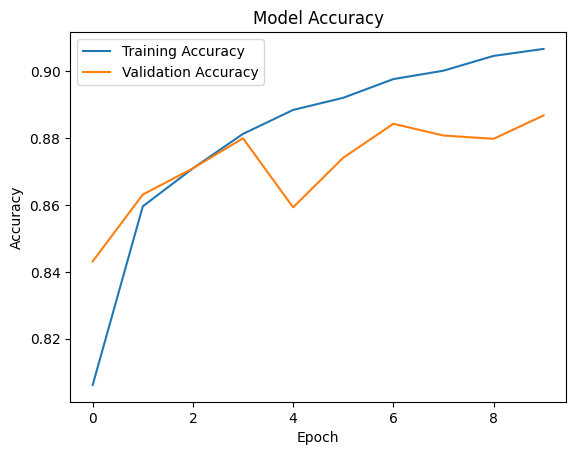

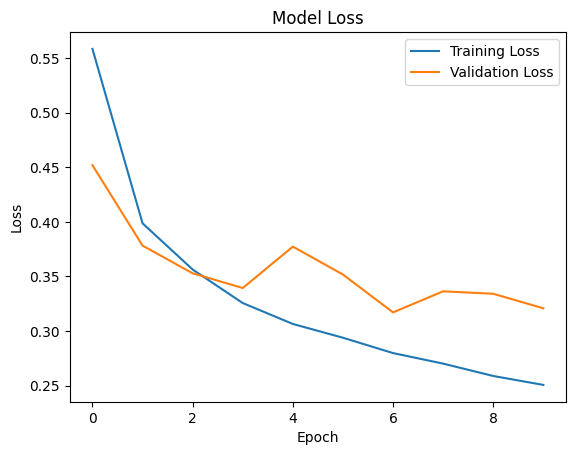

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step


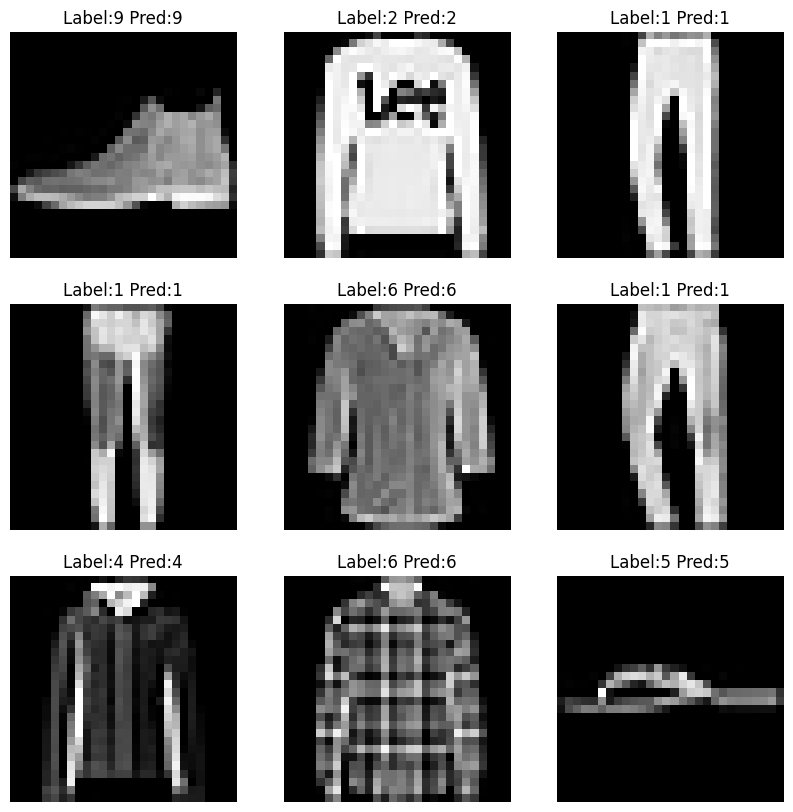

In [18]:
# Display some examples
(_, _), (images, labels) = fashion_mnist.load_data()

# Example: Display the first 9 test images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title("Label:"+ str(labels[i]) + " Pred:"+ str(np.argmax(model.predict(X_test[i:i+1]))))
    plt.axis("off")

plt.show()